<a href="https://colab.research.google.com/github/woodwyyn/ML/blob/main/ML1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

Импорт/вывод данных

In [2]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv",
                header=None)
y = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/main/ML1.2%20multivariate/data/0_y.csv",
                header=None, encoding='utf-8')

In [3]:
x[0].shape, y.shape

((387,), (387, 1))

Парная регрессия

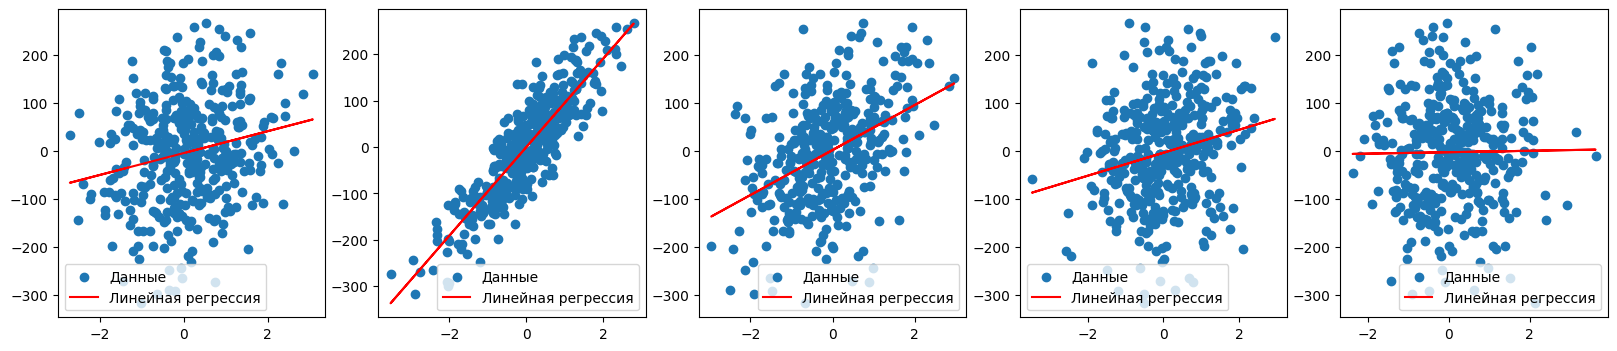

In [47]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i in range(5):
    binary = LinearRegression().fit(x[[i]], y)
    y_pred = binary.predict(x[[i]])

    axes[i].scatter(x[i], y, label='Данные')
    axes[i].plot(x[i], y_pred, color='red', label='Линейная регрессия')
    axes[i].legend()
plt.show()

Коэффициент корреляции для каждого столбца

In [46]:
for i in range(5):
  binary = LinearRegression().fit(x[[i]], y)
  print(f'Атрибут {i+1}, R2: {binary.score(x[[i]], y)}')

Атрибут 1, R2: 0.04364336234689348
Атрибут 2, R2: 0.7699743283650629
Атрибут 3, R2: 0.18794528514998887
Атрибут 4, R2: 0.047470345664983093
Атрибут 5, R2: 0.00017176151145947838


Множественная регрессия

In [37]:
multiple = LinearRegression().fit(x, y)
multiple.score(x, y)

0.9922198026415868

Коэффициент b1

In [39]:
multiple.coef_

array([[15.79537523, 93.21521093, 37.19410687, 31.19129121, -0.23773114]])

Коэффициент b0

In [40]:
multiple.intercept_

array([0.56498354])

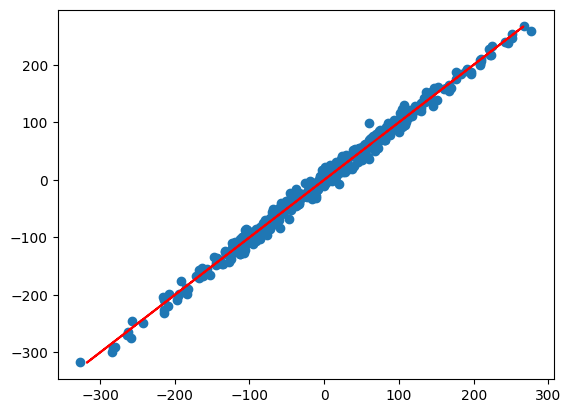

In [38]:
y_pred = multiple.predict(x)
plt.scatter(y_pred, y)
plt.plot(y, y, 'r')

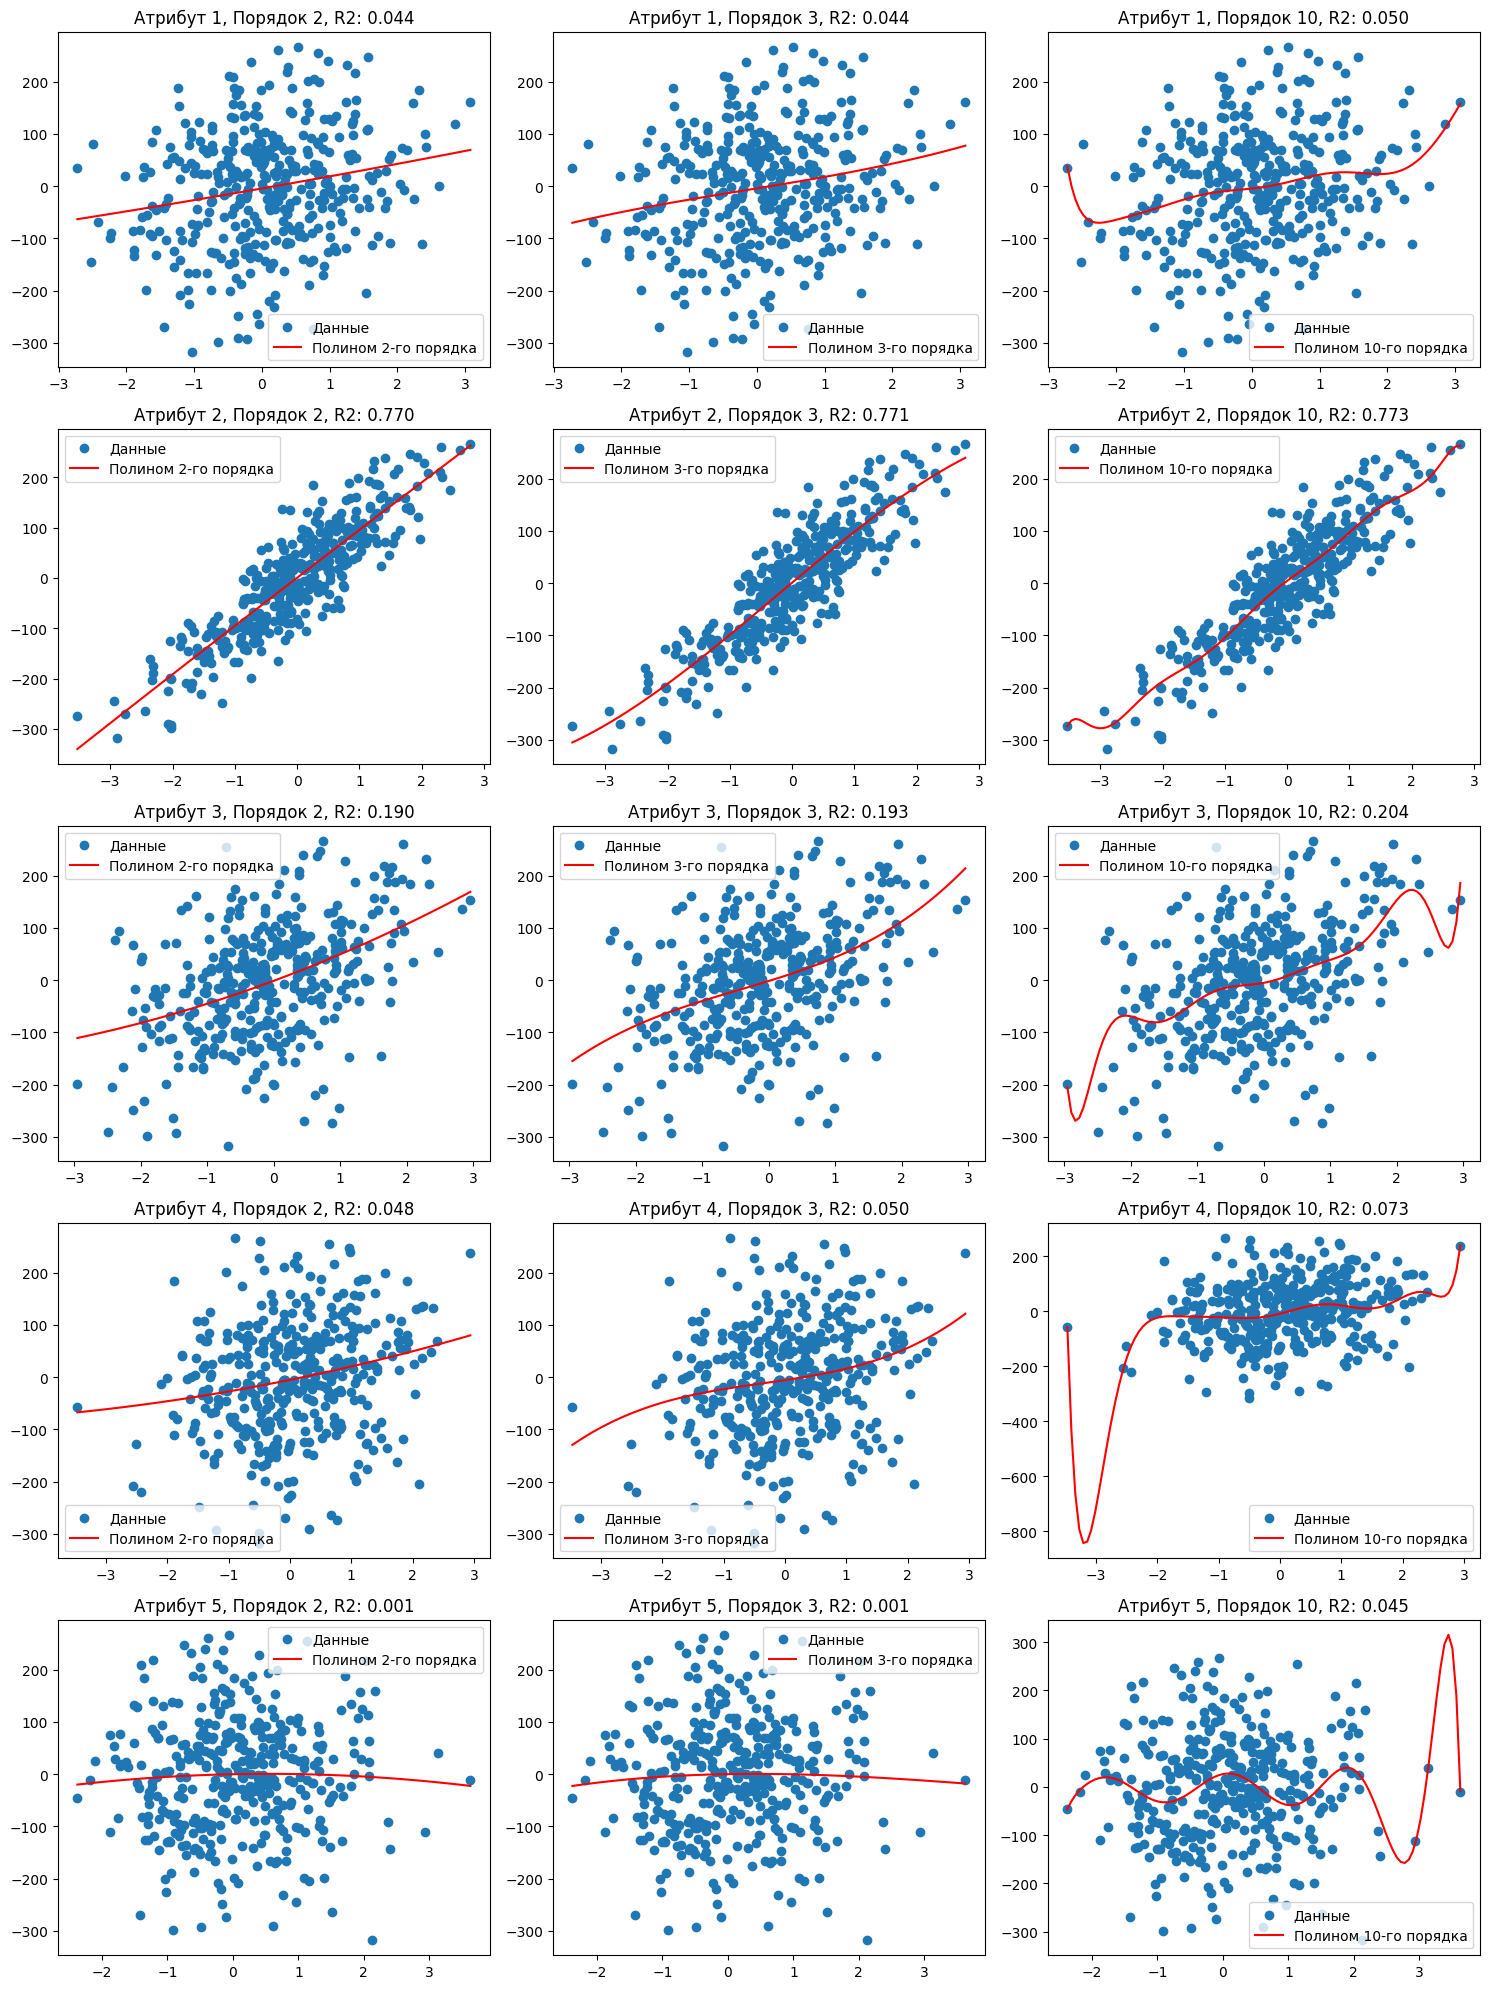

      Атрибут  Порядок полинома        R2           MSE        MAE
0   Атрибут 1                 2  0.043672  11491.909255  85.778988
1   Атрибут 1                 3  0.043765  11490.787323  85.684404
2   Атрибут 1                10  0.050356  11411.586520  84.854224
3   Атрибут 2                 2  0.769994   2763.909753  42.132303
4   Атрибут 2                 3  0.771118   2750.401156  42.061248
5   Атрибут 2                10  0.772677   2731.672893  41.690871
6   Атрибут 3                 2  0.190008   9733.431563  77.458415
7   Атрибут 3                 3  0.192802   9699.859735  77.570200
8   Атрибут 3                10  0.204409   9560.372197  76.815422
9   Атрибут 4                 2  0.047943  11440.588266  83.446884
10  Атрибут 4                 3  0.050312  11412.119234  83.444329
11  Атрибут 4                10  0.072667  11143.475913  82.134261
12  Атрибут 5                 2  0.001049  12004.093016  87.232040
13  Атрибут 5                 3  0.001065  12003.905964  87.22

In [57]:
"""
Функция для полиномиальной регрессии
"""
def polynomial_regression(x_col, y, degree):
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(x_col)
    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    return y_pred, r2, mse, mae

degrees = [2, 3, 10]
results = []

fig, axes = plt.subplots(5, 3, figsize=(15, 20))
for i in range(5):
    x_col = x[[i]]
    xx = np.linspace(x_col.min(), x_col.max(), 100).reshape(-1, 1)

    for j, d in enumerate(degrees):
        y_pred, r2, mse, mae = polynomial_regression(x_col, y, d)
        poly = PolynomialFeatures(d)
        xx_poly = poly.fit_transform(xx)
        model = LinearRegression()
        model.fit(poly.fit_transform(x_col), y)
        yy_pred = model.predict(xx_poly)

        axes[i, j].scatter(x_col, y, label='Данные')
        axes[i, j].plot(xx, yy_pred, color='red', label=f'Полином {d}-го порядка')
        axes[i, j].set_title(f'Атрибут {i+1}, Порядок {d}, R2: {r2:.3f}')
        axes[i, j].legend()

        results.append([f'Атрибут {i+1}', d, r2, mse, mae])

plt.tight_layout()
plt.show()

results_df = pd.DataFrame(results, columns=['Атрибут', 'Порядок полинома', 'R2', 'MSE', 'MAE'])
print(results_df)